In [630]:
### Notebook sampler SMC evaluation

In [1]:
%matplotlib inline
import sys
sys.path.append("/home/alex/python_programming/ABC/oo_sampler")
sys.path.append("/home/alex/python_programming/ABC/oo_sampler/functions")
sys.path.append("/home/alex/python_programming/ABC/oo_sampler/functions/tuberculosis_model")
sys.path.append("/home/alex/python_programming/ABC/oo_sampler/results_smc/mc")
#from functions_smc import *
import pickle
import numpy as np
from functions_smc import smc_sampler_abc
from functions_tuberculosis_model import delta

TypeError: 'int' object has no attribute '__getitem__'

In [2]:
max_number_sim = 40
max_number_eps = 18

N_list = ["250","500","750", "1000", "1500", "2000"]


mean_vector_rqmc = np.zeros((2,max_number_sim,max_number_eps, len(N_list)))
mean_vector_mc = np.zeros((2,max_number_sim,max_number_eps, len(N_list)))
mean_ess_rqmc = np.zeros((max_number_sim,max_number_eps, len(N_list)))
mean_ess_mc = np.zeros((max_number_sim,max_number_eps, len(N_list)))
plot_name = "AIS"
IS = "IS_large_"

selector_string1 = IS+"rqmc_run_gaussian"
selector_string2 = IS+"mc_run_gaussian"
name = ""
N_value_selector = 0

for N_value in N_list:
    
    name = name+"_"+N_value

    for i_sim in range(max_number_sim):

            with open(('/home/alex/python_programming/ABC/oo_sampler/results_smc/rqmc/%s_%i_simulation_smc_abc.p' %(selector_string1+name, i_sim)), 'rb') as f:
                smc_abc_rqmc = pickle.load(f)
            with open(('/home/alex/python_programming/ABC/oo_sampler/results_smc/mc/%s_%i_simulation_smc_abc.p' %(selector_string2+name, i_sim)), 'rb') as g:
                smc_abc_mc = pickle.load(g)

            mean_ess_rqmc[i_sim,:, N_value_selector] = smc_abc_rqmc.ESS[:,:max_number_eps]
            mean_ess_mc[i_sim,:, N_value_selector] = smc_abc_mc.ESS[:,:max_number_eps]

            for j_eps in range(max_number_eps):
                mean_vector_rqmc[:,i_sim,j_eps,N_value_selector] = np.average(smc_abc_rqmc.thetas[:2,:,j_eps],axis=1, weights=smc_abc_rqmc.weights[0,:,j_eps])
                mean_vector_mc[:,i_sim,j_eps,N_value_selector] = np.average(smc_abc_mc.thetas[:2,:,j_eps],axis=1,weights=smc_abc_rqmc.weights[0,:,j_eps])
    N_value_selector += 1
    
#with open('/home/aa11eexx/python_programming/ABC/oo_sampler/results_smc/rqmc/rqmc_run_gaussian_1_simulation_smc_abc.p', 'rb') as f:
#    smc_abc_rqmc2 = pickle.load(f)
#with open('/home/aa11eexx/python_programming/ABC/oo_sampler/rqmc_run1_simulation_smc_abc.p', 'rb') as f:
#    smc_abc_rqmc = pickle.load(f)

    

#smc_abc_rqmc = pickle.load( open( "mc_run2_simulation_smc_abc.p", "rb" ) )

print smc_abc_rqmc.thetas.shape
#print smc_abc_rqmc1.thetas[0,:,0]
#print smc_abc_rqmc2.thetas[0,:,0]
print smc_abc_rqmc.ESS
print smc_abc_mc.ESS
#print smc_abc_rqmc2.ESS

#mc_abc_rqmc = smc_abc_rqmc2
#print smc_abc_rqmc.ESS_drop
#print smc_abc_rqmc.epsilon
#print smc_abc_mc.thetas.shape

#print mean_ess_mc.mean(axis=0)/mean_ess_rqmc.mean(axis=0)
#print mean_ess_mc.mean(axis=0)
#print mean_vector_rqmc
#print mean_vector_mc

var_rqmc =  mean_vector_rqmc.var(axis=1)
var_mc =  mean_vector_mc.var(axis=1)

AttributeError: 'module' object has no attribute 'delta'

In [17]:
var_rqmc_ais = var_rqmc
var_mc_ais = var_mc
from numpy import log


(4, 22)


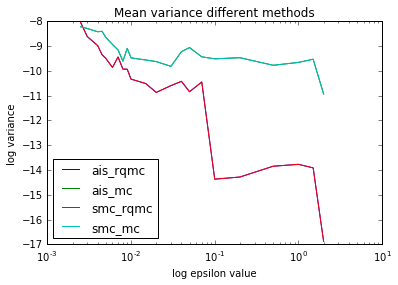

In [18]:
a=  log(var_rqmc_ais[:,:,4].mean(axis=0))
b= log(var_mc_ais[:,:,4].mean(axis=0))
c= log(var_rqmc[:,:,4].mean(axis=0))
d= log(var_mc[:,:,4].mean(axis=0))
var_compare = np.vstack((a,b,c,d))
print var_compare.shape
import matplotlib.pyplot as plt
a= plt.plot( np.fliplr(smc_abc_rqmc.epsilon[:max_number_eps,np.newaxis]), var_compare.T, label=["ais_rqmc", "ais_mc", "smc_rqmc", "smc_mc"])#, 'k')
plt.legend(a, ["ais_rqmc", "ais_mc", "smc_rqmc", "smc_mc"], loc = 0)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('log variance')
plt.xlabel('log epsilon value')
plt.title('Mean variance different methods')
#plt.text(0.003,150,'Mean reduction of \n%s, %s, %s and %s' % (str(reduc_plot[0]), str(reduc_plot[1]), str(reduc_plot[2]) , str(reduc_plot[3]) )) 
plt.show()

[[  50.435   60.647   60.921   74.442   88.131   78.753]
 [  37.537   71.987   69.346   75.928   84.183   80.46 ]
 [  33.826   41.338   53.29    63.195   58.123  109.142]
 [  41.485   44.643   69.489   77.752  111.508  186.21 ]
 [  48.881   60.843   58.008   82.666  113.176  114.724]
 [   2.728    2.84     1.795    4.061    2.854    3.083]
 [   1.862    1.471    3.109    3.121    6.107    4.53 ]
 [   2.661    2.689    1.834    3.922    3.316    2.942]
 [   2.419    1.883    2.007    2.852    2.174    2.928]
 [   1.738    1.674    1.508    2.195    3.453    3.112]
 [   1.714    2.94     1.219    2.146    2.564    2.695]
 [   2.24     2.499    1.531    1.832    2.391    1.346]
 [   1.225    2.249    1.483    1.739    2.329    1.064]
 [   1.519    1.674    1.466    1.369    1.384    0.989]
 [   1.091    0.967    2.77     1.522    1.318    1.311]
 [   1.418    1.459    1.253    1.767    2.519    1.822]
 [   1.941    1.187    1.133    2.381    2.374    1.116]
 [   1.469    1.27     0.698   

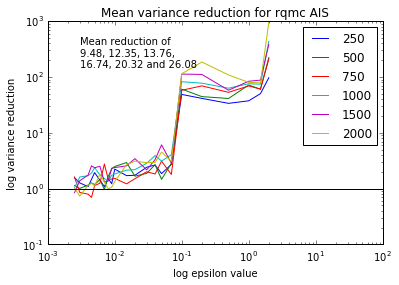

In [19]:
mean_reduction = (var_mc[:,1:]/var_rqmc[:,1:]).mean(axis=0).round(3)
print mean_reduction
reduc_plot =  mean_reduction[1:,:].mean(axis=0).round(2)

print reduc_plot

print smc_abc_mc.epsilon
print smc_abc_rqmc.epsilon
import matplotlib.pyplot as plt
print smc_abc_rqmc.epsilon.shape
print np.log(var_mc[1,:max_number_eps]/var_rqmc[1,:max_number_eps]).shape
#fig = plt.figure()
#ax = fig.add_subplot(2,1,1)
#plt.plot( np.fliplr(smc_abc_rqmc.epsilon[:max_number_eps,np.newaxis]), (var_mc[1,:max_number_eps]/var_rqmc[1,:max_number_eps]), 'r')
a= plt.plot( np.fliplr(smc_abc_rqmc.epsilon[:max_number_eps,np.newaxis]), (var_mc[:,:max_number_eps]/var_rqmc[:,:max_number_eps]).mean(axis=0), label=N_list)#, 'k')
plt.plot([0.001,100],[1,1], 'k-')
plt.legend(a, N_list)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('log variance reduction')
plt.xlabel('log epsilon value')
plt.title('Mean variance reduction for rqmc '+plot_name)
plt.text(0.003,150,'Mean reduction of \n%s, %s, %s, \n%s, %s and %s' % (str(reduc_plot[0]), str(reduc_plot[1]), str(reduc_plot[2]) , str(reduc_plot[3]), str(reduc_plot[4]), str(reduc_plot[5]) )) 
plt.show()

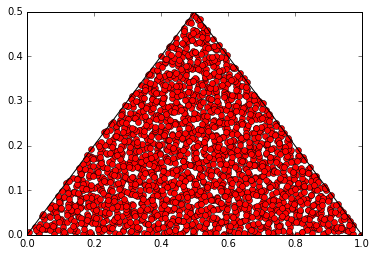

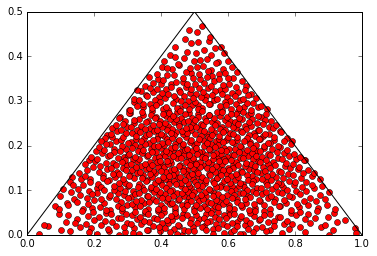

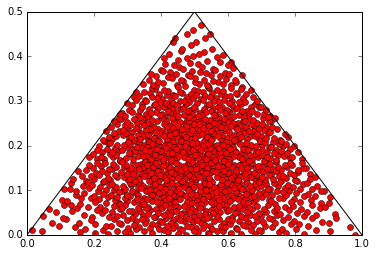

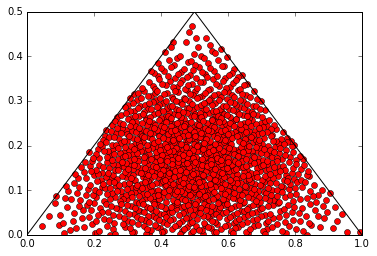

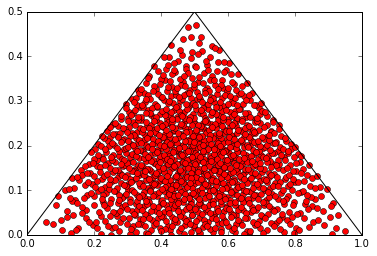

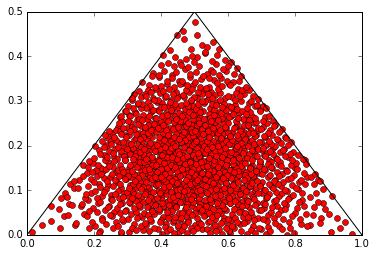

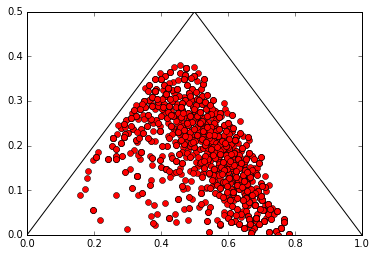

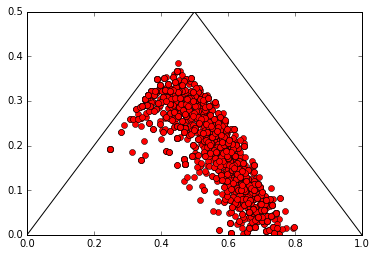

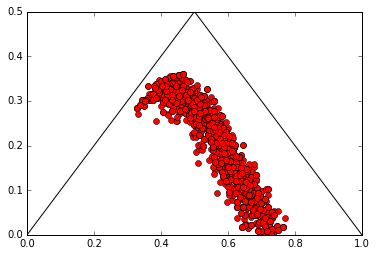

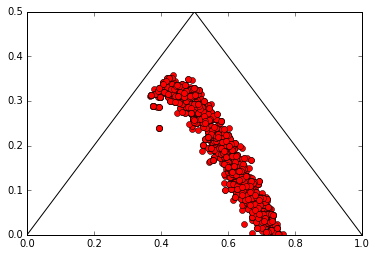

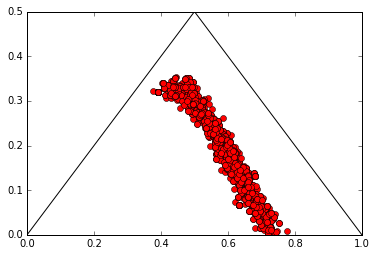

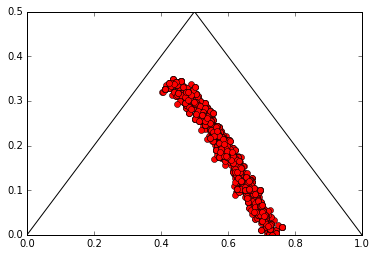

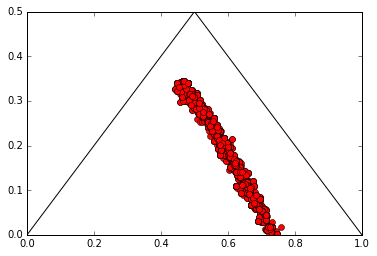

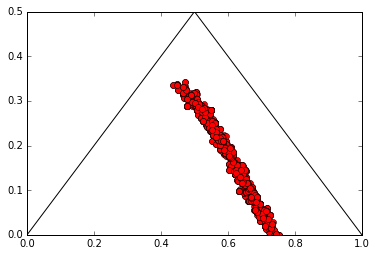

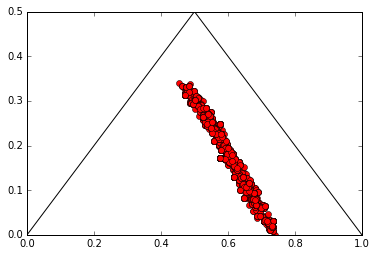

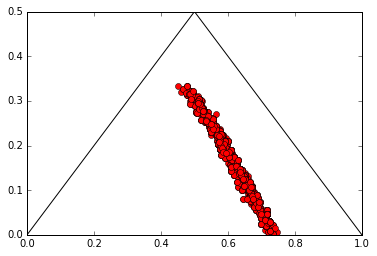

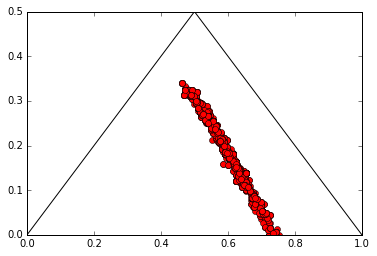

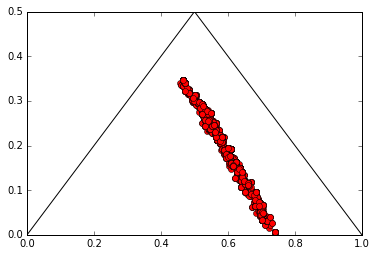

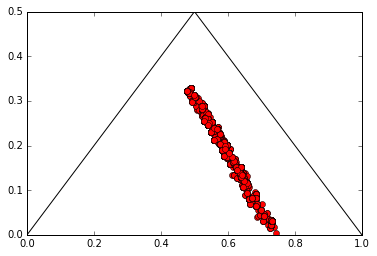

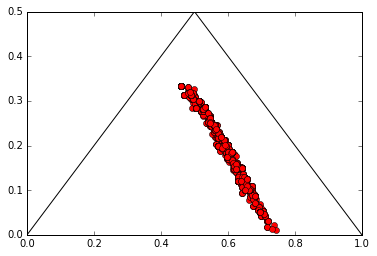

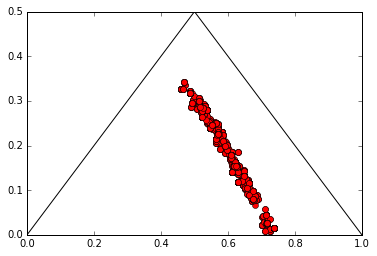

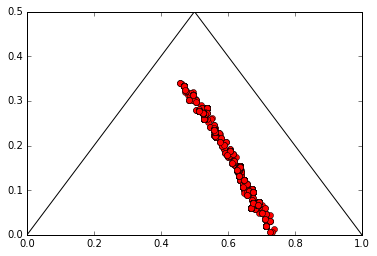

In [24]:
import matplotlib.pyplot as plt
import string
#t_index = 2
alphabet = list(string.ascii_lowercase)
for t_index in range(22):
    selector = smc_abc_rqmc.weights[0,:,t_index].nonzero()

    x = smc_abc_rqmc.thetas[0,selector,t_index]
    y = smc_abc_rqmc.thetas[1,selector,t_index]
    plt.plot(x,y, 'ro')
    plt.axis([0, 1, 0, 0.5])
    plt.plot([0,0.5],[0, 0.5], 'k-')
    plt.plot([0.5,1],[0.5, 0], 'k-')
    #plt.savefig(alphabet[t_index]+'_AIS.png')
    plt.savefig('AIS-'+str(t_index)+'.png')
    plt.show()